In [2]:
import pandas as pd
import numpy as np
import io
from google.colab import files

In [6]:
uploaded_file = files.upload()

Saving data.csv to data (1).csv


In [7]:
dataset = pd.DataFrame(pd.read_csv(io.BytesIO(uploaded_file['data.csv']),sep=';'))

In [8]:
#dataset = pd.read_csv("C:/Users/khurr/Documents/GitHub/MM/data.csv",sep=';')
dataset = dataset.sample(frac=1)

In [9]:
dataset.head(10)

,brand,country,currency,customers_per_day,outlet_id,week_id,weekday,sales_per_day
11138,MediaMarkt,italy,EURO,1201.0,598.0,31.0,wed,65836.89
14580,Saturn,germany,EURO,1989.0,51.0,31.0,fri,63091.60
11860,MediaMarkt,germany,EURO,2013.0,14.0,39.0,fri,64448.01
5636,MediaMarkt,spain,EURO,447.0,100.0,15.0,tue,52898.44
5250,Saturn,spain,EURO,1053.0,112.0,45.0,wed,59056.84
8730,Saturn,netherlands,EURO,2687.0,601.0,15.0,sat,67929.38
17273,MediaMarkt,spain,EURO,350.0,164.0,2.0,tue,42547.37
12383,MediaMarkt,italy,EURO,2014.0,530.0,26.0,sat,65864.67
15191,MediaMarkt,germany,EURO,431.0,79.0,32.0,thu,52752.25
16825,MediaMarkt,spain,EURO,418.0,164.0,12.0,thu,65064.84


In [10]:
dataset.isnull().sum()

brand                33
country              22
currency             23
customers_per_day     8
outlet_id            13
week_id              13
weekday              37
sales_per_day        14
dtype: int64

In [11]:
dataset.shape

(18207, 8)

In [12]:
dataset=dataset.replace(-999999.0,0)
values = {'brand':'Unknown','country':'Unknown','currency':'Unknown','customers_per_day':0,
          'outlet_id':0,'week_id':0,'weekday':'Unknown','sales_per_day':0}
dataset=dataset.fillna(value=values)


In [13]:
dataset.isnull().sum()

brand                0
country              0
currency             0
customers_per_day    0
outlet_id            0
week_id              0
weekday              0
sales_per_day        0
dtype: int64

In [14]:
dataset.describe()

,customers_per_day,outlet_id,week_id,sales_per_day
count,18207.000000,18207.000000,18207.000000,18207.000000
mean,973.247927,303.111990,26.815071,51223.689187
std,888.419234,216.239222,14.751187,22262.706963
min,0.000000,0.000000,0.000000,0.000000
25%,327.000000,97.000000,14.000000,51247.500000
50%,550.000000,255.000000,27.000000,57310.430000
75%,1605.000000,530.000000,40.000000,63156.480000
max,4734.000000,698.000000,52.000000,96225.530000


In [15]:
dataset = pd.get_dummies(dataset, prefix=['brand', 'country', 'currency', 'weekday'])

In [16]:
dataset.head(10)

,customers_per_day,outlet_id,week_id,sales_per_day,brand_MediaMarkt,brand_Saturn,brand_Unknown,country_Unknown,country_austria,country_germany,country_greece,country_italy,country_netherlands,country_spain,country_switzerland,currency_CHF,currency_EURO,currency_Unknown,weekday_Unknown,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
11138,1201.0,598.0,31.0,65836.89,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
14580,1989.0,51.0,31.0,63091.60,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
11860,2013.0,14.0,39.0,64448.01,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
5636,447.0,100.0,15.0,52898.44,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
5250,1053.0,112.0,45.0,59056.84,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
8730,2687.0,601.0,15.0,67929.38,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
17273,350.0,164.0,2.0,42547.37,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
12383,2014.0,530.0,26.0,65864.67,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
15191,431.0,79.0,32.0,52752.25,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
16825,418.0,164.0,12.0,65064.84,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [17]:
y = dataset['sales_per_day']

In [ ]:
y

6953     47127.03
18075    51848.40
745      50083.94
14591    57702.93
11372        0.00
           ...   
2930         0.00
3563     62179.43
12707    70824.10
12378    57757.43
67       56928.92
Name: sales_per_day, Length: 18207, dtype: float64

In [18]:
dataset.drop(columns='sales_per_day', inplace=True)

In [19]:
dataset.head()

,customers_per_day,outlet_id,week_id,brand_MediaMarkt,brand_Saturn,brand_Unknown,country_Unknown,country_austria,country_germany,country_greece,country_italy,country_netherlands,country_spain,country_switzerland,currency_CHF,currency_EURO,currency_Unknown,weekday_Unknown,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
11138,1201.0,598.0,31.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
14580,1989.0,51.0,31.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
11860,2013.0,14.0,39.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
5636,447.0,100.0,15.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
5250,1053.0,112.0,45.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [20]:
X_train = dataset[0:10920]
Y_train = y[0:10920]

In [21]:
X_test = dataset[10920:16380]
Y_test = y[10920:16380]

In [22]:
X_val = dataset[16380:]
Y_val = y[16380:]

In [23]:
xtrain_mean = dataset.iloc[:, :3].mean(axis=0)
xtrain_std = dataset.iloc[:, :3].std(axis=0)

In [24]:
dataset.iloc[:, :3] -= xtrain_mean
dataset.iloc[:, :3] /= xtrain_std
dataset

,customers_per_day,outlet_id,week_id,brand_MediaMarkt,brand_Saturn,brand_Unknown,country_Unknown,country_austria,country_germany,country_greece,country_italy,country_netherlands,country_spain,country_switzerland,currency_CHF,currency_EURO,currency_Unknown,weekday_Unknown,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
11138,0.256357,1.363712,0.283701,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
14580,1.143325,-1.165894,0.283701,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
11860,1.170339,-1.337001,0.826030,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
5636,-0.592342,-0.939293,-0.800957,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
5250,0.089769,-0.883799,1.232777,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,0.699841,-0.319609,-0.326419,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
17754,-0.688017,0.804146,0.961613,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
483,-0.393112,0.138217,-0.326419,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3296,0.012102,-0.319609,0.826030,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [25]:
ytrain_mean = Y_train.mean(axis=0)
ytrain_std = Y_train.std(axis=0)
Y_train -= ytrain_mean
Y_train /= ytrain_std
Y_train

11138    0.658448
14580    0.534850
11860    0.595918
5636     0.075936
5250     0.353198
           ...   
1952     0.568985
13973    1.252472
454      0.225271
13065    0.359737
9520     0.282073
Name: sales_per_day, Length: 10920, dtype: float64

In [26]:
xval_mean = X_val.iloc[:, :3].mean(axis=0)
xval_std = X_val.iloc[:, :3].std(axis=0)
X_val.iloc[:, :3] -= xval_mean
X_val.iloc[:, :3] /= xval_std
X_val

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,customers_per_day,outlet_id,week_id,brand_MediaMarkt,brand_Saturn,brand_Unknown,country_Unknown,country_austria,country_germany,country_greece,country_italy,country_netherlands,country_spain,country_switzerland,currency_CHF,currency_EURO,currency_Unknown,weekday_Unknown,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
8943,-0.675071,0.153006,-1.286347,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4677,1.202309,0.181116,1.179139,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3131,-0.149543,-1.341494,-1.217861,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
10231,-1.093419,-0.741820,-0.122090,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
6952,1.042115,0.157691,-0.533004,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,0.744777,-0.310804,-0.327547,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
17754,-0.676223,0.827639,0.973682,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
483,-0.374275,0.153006,-0.327547,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3296,0.040615,-0.310804,0.836710,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [27]:
yval_mean = Y_val.mean(axis=0)
yval_std = Y_val.std(axis=0)
Y_val -= yval_mean
Y_val /= yval_std
Y_val

8943     0.031897
4677     0.972708
3131     0.441984
10231   -2.309290
6952     0.150045
           ...   
2684     0.470913
17754    0.192016
483      0.676164
3296     0.509464
16790    0.518824
Name: sales_per_day, Length: 1827, dtype: float64

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [29]:
network = Sequential()
X_train.shape[1]

25

In [30]:
network.add(layers.Dense(15, activation='relu', kernel_regularizer=regularizers.l2(0.02), input_shape=(X_train.shape[1],)))
network.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
network.add(layers.Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
network.add(layers.Dense(1))

In [31]:
network.compile(optimizer='adam', loss='mse', metrics='mae')

In [32]:
history = network.fit(X_train, Y_train, batch_size=200, epochs=45, validation_data=(X_val, Y_val))

Epoch 1/45
55/55 [==============================] - 1s 12ms/step - loss: 1.6639 - mae: 0.6408 - val_loss: 1.2195 - val_mae: 0.5429
Epoch 2/45
55/55 [==============================] - 0s 2ms/step - loss: 1.0902 - mae: 0.4946 - val_loss: 0.7133 - val_mae: 0.3249
Epoch 3/45
55/55 [==============================] - 0s 2ms/step - loss: 0.6318 - mae: 0.2699 - val_loss: 0.5022 - val_mae: 0.1823
Epoch 4/45
55/55 [==============================] - 0s 3ms/step - loss: 0.4737 - mae: 0.1728 - val_loss: 0.4150 - val_mae: 0.1690
Epoch 5/45
55/55 [==============================] - 0s 3ms/step - loss: 0.3994 - mae: 0.1668 - val_loss: 0.3510 - val_mae: 0.1651
Epoch 6/45
55/55 [==============================] - 0s 2ms/step - loss: 0.3374 - mae: 0.1618 - val_loss: 0.3018 - val_mae: 0.1637
Epoch 7/45
55/55 [==============================] - 0s 3ms/step - loss: 0.2884 - mae: 0.1588 - val_loss: 0.2642 - val_mae: 0.1629
Epoch 8/45
55/55 [==============================] - 0s 2ms/step - loss: 0.2568 - mae: 0.1

In [33]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [34]:
epochs = range(1,46)

In [35]:
import matplotlib.pyplot as plt

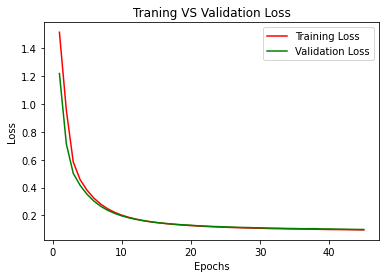

In [36]:
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Traning VS Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
xtest_mean = X_test.iloc[:, :3].mean(axis=0)
xtest_std = X_test.iloc[:, :3].std(axis=0)
X_test.iloc[:, :3] -= xtest_mean
X_test.iloc[:, :3] /= xtest_std
X_test

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,customers_per_day,outlet_id,week_id,brand_MediaMarkt,brand_Saturn,brand_Unknown,country_Unknown,country_austria,country_germany,country_greece,country_italy,country_netherlands,country_spain,country_switzerland,currency_CHF,currency_EURO,currency_Unknown,weekday_Unknown,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
13520,0.643737,-0.748961,-0.277158,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
9756,-0.468412,-0.915085,-1.425270,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
7572,-0.445010,-0.324420,-1.290198,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
15113,-1.089120,-0.965846,0.128059,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
13328,-0.624424,0.944588,-0.344694,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,-0.628882,-1.081210,-1.425270,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3981,-1.089120,0.538506,-0.682374,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
8362,-0.606594,1.355285,1.343707,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
11912,0.351770,-1.081210,0.330667,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [39]:
network.evaluate(X_test, Y_test)

171/171 [==============================] - 0s 999us/step - loss: 3127278336.0000 - mae: 51243.6875


[3127278336.0, 51243.6875]

**TRYING WITH MACHINE LEARNING MODEL**


In [40]:
from sklearn.linear_model import LinearRegression

LR_model=LinearRegression().fit(X_train,Y_train)#We are training.
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)
#
print('LinearRegression Train score:',LR_model.score(X_train,Y_train))
print('LinearRegression Test score:' ,LR_model.score(X_test,Y_test))

LinearRegression Train score: 0.9554102816256731
LinearRegression Test score: -5.237005878126193
